In [12]:
import nvdbapiv3 
import geopandas as gpd
import pandas as pd 
from shapely import wkt
import matplotlib.pyplot as plt

In [2]:
mySearchObject = nvdbapiv3.nvdbFagdata(105)

In [4]:
mySearchObject.info()

nvdbFagdata: Søkeobjekt for vegobjekter fra NVDB api V3
ObjektType: 105 Fartsgrense
Filtere
{}
Parametre som styrer responsen:
{
    "inkluder": [
        "alle"
    ]
}
Statistikk fra NVDB api V3
{
    "antall": 912058,
    "lengde": 247929778.667
}
Pagineringsinfo: Antall objekt i databuffer= 0
{
    "antall": 1000,
    "hvilken": 0,
    "meredata": true,
    "initielt": true,
    "dummy": false
}


Converting to Pandas DataFrame 

In [5]:
myDataFrame = pd.DataFrame( mySearchObject.to_records( ))

Eksport av 912058 objekter kommer til å ta tid...
Objekt 1000 av 912058
Objekt 5000 av 912058
Objekt 10000 av 912058
Objekt 20000 av 912058
Objekt 30000 av 912058
Objekt 40000 av 912058
Objekt 50000 av 912058
Objekt 60000 av 912058
Objekt 70000 av 912058
Objekt 80000 av 912058
Objekt 90000 av 912058
Objekt 100000 av 912058
Objekt 110000 av 912058
Objekt 120000 av 912058
Objekt 130000 av 912058
Objekt 140000 av 912058
Objekt 150000 av 912058
Objekt 160000 av 912058
Objekt 170000 av 912058
Objekt 180000 av 912058
Objekt 190000 av 912058
Objekt 200000 av 912058
Objekt 210000 av 912058
Objekt 220000 av 912058
Objekt 230000 av 912058
Objekt 240000 av 912058
Objekt 250000 av 912058
Objekt 260000 av 912058
Objekt 270000 av 912058
Objekt 280000 av 912058
Objekt 290000 av 912058
Objekt 300000 av 912058
Objekt 310000 av 912058
Objekt 320000 av 912058
Objekt 330000 av 912058
Objekt 340000 av 912058
Objekt 350000 av 912058
Objekt 360000 av 912058
Objekt 370000 av 912058
Objekt 380000 av 912058
Obj

Converting to Geopandas Geodataframe

In [6]:
myDataFrame['geometry'] = myDataFrame['geometri'].apply( wkt.loads )
myGDF = gpd.GeoDataFrame( myDataFrame, geometry='geometry', crs=5973 )

Reprojecting into lon/lat coordinates (x,y). Note the axis order.

In [7]:
myGDF = myGDF.to_crs( 'epsg:4326' )

Attribute naming, translating long Norwegian names into short (10char) English abbreviations. This 10 char limit is one of the curses of the shape file

In [8]:
myGDF['SpeedLim'] = myGDF['Fartsgrense'] 
myGDF['RoadCat'] = myGDF['vegkategori'] 
myGDF['RoadNum'] = myGDF['vegkategori'] + myGDF['vegnummer'].astype(str) 

In [9]:
# These are linear references to the link sequences of NVDB, so that we can trace problems back to the NVDB network 
myGDF['linkID']  = myGDF['veglenkesekvensid']
myGDF['linkFrom'] = myGDF['startposisjon']
myGDF['linkTo']   = myGDF['sluttposisjon'] 

In [10]:
# We also include the ID and version number of the speed limit object in NVDB data base
columns =  ['SpeedLim', 'RoadCat', 'RoadNum', 'linkID', 'linkFrom', 'linkTo', 'nvdbId', 'versjon', 'geometry']

In [11]:
print( list( myGDF.columns ) )

['objekttype', 'nvdbId', 'versjon', 'startdato', 'Fartsgrense', 'Gyldig fra dato', 'veglenkesekvensid', 'detaljnivå', 'typeVeg', 'kommune', 'fylke', 'vref', 'veglenkeType', 'vegkategori', 'fase', 'vegnummer', 'startposisjon', 'sluttposisjon', 'segmentlengde', 'adskilte_lop', 'trafikantgruppe', 'geometri', 'Vedtaksnummer', 'Arkivnummer', 'relasjoner', 'geometry', 'SpeedLim', 'RoadCat', 'RoadNum', 'linkID', 'linkFrom', 'linkTo']


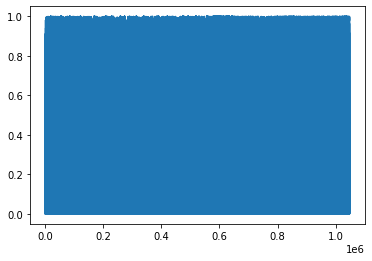

In [27]:
plt.plot(myGDF['startposisjon'])
plt.show()

In [24]:
myGDF['startposisjon']

0          0.000000
1          0.000000
2          0.000000
3          0.156665
4          0.000000
             ...   
1048498    0.000000
1048499    0.000000
1048500    0.000000
1048501    0.610509
1048502    0.981364
Name: startposisjon, Length: 1048503, dtype: float64

In [25]:
# Writing data to esri shapefile
myGDF[columns].to_file( 'nvdbspeedlimit.shp') 

C:\Users\GeraldoFranciscodeSo\anaconda3\envs\RoadData\lib\site-packages\geopandas\io\file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
